# Chapter 18: Reinforcement Learning

Ensure GPU Env is working correctly

In [1]:
import tensorflow as tf
import os
from tensorflow import keras

In [2]:
tf.__version__

'2.8.0'

In [3]:
keras.__version__

'2.8.0'

In [4]:
print("Num of GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num of GPUs Available:  1


## Additional Libraries

In [5]:
import numpy as np
import pandas as pd
import os 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from pathlib import Path

## An introduction to OpenAI gym

Throughout this notebook we be using the OpenAI gym pacakge for developing and building Reinforcement Learning Algorithms. There will be many different environments for learnings agents to interact inside of. Let's get started.

In [94]:
%pip install -U tf-agents pyvirtualdisplay
%pip install -U gym>=0.21.0
%pip install -U gym[box2d,atari,accept-rom-license]

import gym

  Using cached tf_agents-0.12.0-py3-none-any.whl (1.3 MB)
  Using cached gym-0.23.1-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


  Using cached box2d-py-2.3.5.tar.gz (374 kB)
  Running setup.py clean for box2d-py
Failed to build box2d-py
    Running setup.py install for box2d-py: started
    Running setup.py install for box2d-py: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'D:\Anaconda\envs\tf-gpu\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\User\\AppData\\Local\\Temp\\pip-install-cwb1zu7_\\box2d-py_8824b902d9744efc9737713e26b43851\\setup.py'"'"'; __file__='"'"'C:\\Users\\User\\AppData\\Local\\Temp\\pip-install-cwb1zu7_\\box2d-py_8824b902d9744efc9737713e26b43851\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\User\AppData\Local\Temp\pip-wheel-9exl9z12'
       cwd: C:\Users\User\AppData\Local\Temp\pip-install-cwb1zu7_\box2d-py_8824b902d9744efc9737713e26b43851\
  Complete output (16 lines):
  Using setuptools (version 60.5.0).
  running bdist_wheel
  running build
  running build_py
  creating build
  cre

In [95]:
# All available environments
gym.envs.registry.all()

ValuesView(├──CartPole: [ v0, v1 ]
├──MountainCar: [ v0 ]
├──MountainCarContinuous: [ v0 ]
├──Pendulum: [ v1 ]
├──Acrobot: [ v1 ]
├──LunarLander: [ v2 ]
├──LunarLanderContinuous: [ v2 ]
├──BipedalWalker: [ v3 ]
├──BipedalWalkerHardcore: [ v3 ]
├──CarRacing: [ v1 ]
├──Blackjack: [ v1 ]
├──FrozenLake: [ v1 ]
├──FrozenLake8x8: [ v1 ]
├──CliffWalking: [ v0 ]
├──Taxi: [ v3 ]
├──Reacher: [ v2 ]
├──Pusher: [ v2 ]
├──InvertedPendulum: [ v2 ]
├──InvertedDoublePendulum: [ v2 ]
├──HalfCheetah: [ v2, v3 ]
├──Hopper: [ v2, v3 ]
├──Swimmer: [ v2, v3 ]
├──Walker2d: [ v2, v3 ]
├──Ant: [ v2, v3 ]
├──Humanoid: [ v2, v3 ]
└──HumanoidStandup: [ v2 ]
)

Let us begin with Cart-Pole. Cart-POle is an environment where a cart has a pole in the middle of the cart and the cart can move left or right and the pole can swing left or right. The goal is to move the cart either left or right and keep the pole upright.

In [96]:
env = gym.make('CartPole-v1')

Now, we initialize the environment by calling the reset method. This gives up an observation:

In [97]:
obs = env.reset(seed=36)
obs

array([-0.03193669, -0.01017632,  0.03938324, -0.0096614 ], dtype=float32)

This observation is a 1D numpy array with 4 float values consistings of the cart's horizontal position, velocity, angle of the pole (0 = vertical), and the angular velocity

Now, this environment can be visualized by called the render method. **NOTE:** This may open in a seperate window

In [98]:
env.render()

True

Heres an example of the window:

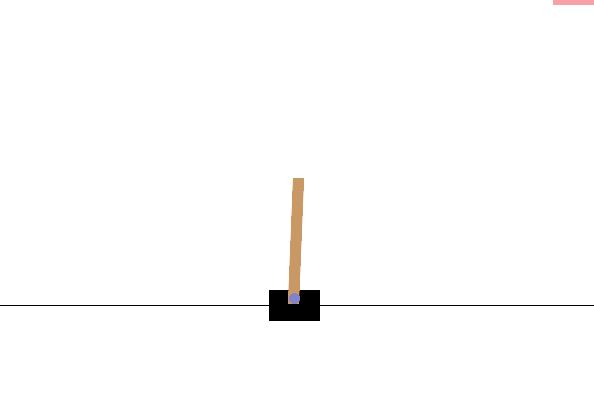

In [99]:
# convert rendered image of environment to numpy array

img = env.render(mode="rgb_array")
img.shape

(400, 600, 3)

Now as the same example shown above, we can do the exact same thing with matplotlib:

In [100]:
def plot_environment(env, figsize=(5, 4)):
    plt.figure(figsize=figsize)
    img = env.render(mode="rgb_array")
    plt.imshow(img)
    plt.axis("off")
    return img

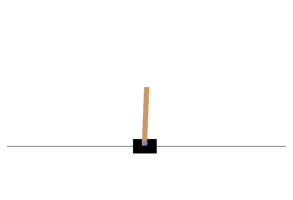

In [101]:
plot_environment(env)
plt.show()

The agent will need to select an action from an "action space" (the set of possible actions). Let's see what this environment's action space looks like:

In [102]:
env.action_space

Discrete(2)

This means 2 possible actions, accelerate left or right. Let's look again quickly at our initial observation:

In [103]:
obs

array([-0.03193669, -0.01017632,  0.03938324, -0.0096614 ], dtype=float32)

Because the pole is learning to the right based on obs[2] we will accelerate the cart to the right

In [104]:
action = 1 # accelerate right
obs, reward, done, info = env.step(action)
obs

array([-0.03214022,  0.18435934,  0.03919001, -0.28966293], dtype=float32)

Notice that the cart is now moving toward the right (obs[1] > 0). The pole is still tilted toward the right (obs[2] > 0), but its angular velocity is now negative (obs[3] < 0), so it will likely be tilted toward the left after the next step.

In [105]:
# Check reward system so far based on last step achieved by agent
reward

1.0

When game is done, the environment return done=True:

In [106]:
done

False

Finally, info is an environment-specific dictionary that can provide some extra information that may be useful for debugging or for training. For example, in some games it may indicate how many lives the agent has.

In [107]:
info

{}

The sequence of steps between the moment the environment is reset until it is done is called an "episode". At the end of an episode (i.e., when step() returns done=True), We will reset the environment before continuing to use it.

In [108]:
if done:
    obs = env.reset()

Now to build a policy to help use past actions and observations to decide what to do.

## Building a hard-coded policy

Now to build a policy where if the pole tilts left, push the cart left, else vice versa:

In [109]:
def policy(obs):
    angle = obs[2]
    return 0 if angle < 0 else 1

totals = []
for episode in range(500):
    episode_rewards = 0
    obs = env.reset()
    for step in range(200):
        action = policy(obs)
        obs, reward, done, info = env.step(action)
        episode_rewards += reward
        if done:
            break
    totals.append(episode_rewards)

In [110]:
np.mean(totals), np.std(totals), np.min(totals), np.max(totals)

(42.022, 9.085456290137552, 24.0, 68.0)

So we managed to succeed for 68 steps. The environment is considered solved when the agent holds the poll up for at least 200 steps. Let us now take a look at an episode:

In [111]:
frames = []

obs = env.reset()
for step in range(200):
    img = env.render(mode="rgb_array")
    frames.append(img)
    action = policy(obs)

    obs, reward, done, info = env.step(action)
    if done:
        break

In [112]:
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')

def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = animation.FuncAnimation(
        fig, update_scene, fargs=(frames, patch),
        frames=len(frames), repeat=repeat, interval=interval)
    plt.close()
    return anim

In [113]:
plot_animation(frames)

Now that we see how the system is performing given the wobbles in the pool. Let's try a Neural Network Policy now:

## Neural Network Policies

Let's create a neural network that will take observations as inputs, and output the probabilities of actions to take for each observation. To choose an action, the network will estimate a probability for each action, then we will select an action randomly according to the estimated probabilities. In the case of the Cart-Pole environment, there are just two possible actions (left or right), so we only need one output neuron: it will output the probability p of the action 0 (left), and of course the probability of action 1 (right) will be 1 - p.

In [114]:
n_inputs = 4 # == env.observation_space.shape[0]

model = keras.models.Sequential([
    keras.layers.Dense(5, activation="elu", input_shape=[n_inputs]),
    keras.layers.Dense(1, activation="sigmoid"),
])

In this particular environment, the past actions and observations can safely be ignored, since each observation contains the environment's full state. 

The approach of the network lets the agent find the right balance between exploring new actions and exploiting the actions that are known to work well. Here's an analogy: suppose you go to a restaurant for the first time, and all the dishes look equally appealing so you randomly pick one. If it turns out to be good, you can increase the probability to order it next time, but you shouldn't increase that probability to 100%, or else you will never try out the other dishes, some of which may be even better than the one you tried.

Now to write a small function that will run the model to play one episode, and return the frames so we can display an animation:

In [115]:
def render_policy_net(model, n_max_steps=200, seed=42):
    frames = []
    env = gym.make("CartPole-v1")
    env.reset(seed=seed)
    np.random.seed(seed)
    obs = env.reset()
    for step in range(n_max_steps):
        frames.append(env.render(mode="rgb_array"))
        left_proba = model.predict(obs.reshape(1, -1))
        action = int(np.random.rand() > left_proba)
        obs, reward, done, info = env.step(action)
        if done:
            break
    env.close()
    return frames

In [116]:
# Testing our new NN policy network
frames = render_policy_net(model)
plot_animation(frames)

Not the greatest result. Now to up it a bit. We will start to have it learn to go left if the pole is tilting left, and vise versa. Then, we make the same network play in 50 different environments in parallel and train that for 5000 iterations. 

In [117]:
n_environments = 50
n_iterations = 5000

envs = [gym.make("CartPole-v1") for i in range(n_environments)]
for index, env in enumerate(envs):
    env.reset(seed = index)
observations = [env.reset() for env in envs]
optimizer = keras.optimizers.RMSprop()
loss_fn = keras.losses.binary_crossentropy

for iteration in range(n_iterations):
    # if angle < 0, we want proba(left) = 1., or else proba(left) = 0.
    target_probas = np.array([([1.] if obs[2] < 0 else [0.])
                              for obs in observations])
    with tf.GradientTape() as tape:
        left_probas = model(np.array(observations))
        loss = tf.reduce_mean(loss_fn(target_probas, left_probas))
    print("\rIteration: {}, Loss: {:.3f}".format(iteration, loss.numpy()), end="")
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    actions = (np.random.rand(n_environments, 1) > left_probas.numpy()).astype(np.int32)
    for env_index, env in enumerate(envs):
        obs, reward, done, info = env.step(actions[env_index][0])
        observations[env_index] = obs if not done else env.reset()

for env in envs:
    env.close()

Iteration: 4999, Loss: 0.054

In [118]:
frames = render_policy_net(model)
plot_animation(frames)

Great! Now to see if it can learn a better policy on its own:

## Policy Gradients

To train this neural network we will need to define the target probabilities y. If an action is good we should increase its probability, and conversely if it is bad we should reduce it. But how do we know whether an action is good or bad? The problem is that most actions have delayed effects, so when you win or lose points in an episode, it is not clear which actions contributed to this result: was it just the last action? Or the last 10? Or just one action 50 steps earlier? This is called the credit assignment problem.

The Policy Gradients algorithm tackles this problem by first playing multiple episodes, then making the actions in good episodes slightly more likely, while actions in bad episodes are made slightly less likely. First we play, then we go back and think about what we did.

Let's start by creating a function to play a single step using the model. We will also pretend for now that whatever action it takes is the right one, so we can compute the loss and its gradients (we will just save these gradients for now, and modify them later depending on how good or bad the action turned out to be):

In [119]:
def play_one_step(env, obs, model, loss_fn):
    with tf.GradientTape() as tape:
        left_proba = model(obs[np.newaxis])
        action = (tf.random.uniform([1, 1]) > left_proba)
        y_target = tf.constant([[1.]]) - tf.cast(action, tf.float32)
        loss = tf.reduce_mean(loss_fn(y_target, left_proba))
    grads = tape.gradient(loss, model.trainable_variables)
    obs, reward, done, info = env.step(int(action[0, 0].numpy()))
    return obs, reward, done, grads

If left_proba is high, then action will most likely be False (since a random number uniformally sampled between 0 and 1 will probably not be greater than left_proba). And False means 0 when you cast it to a number, so y_target would be equal to 1 - 0 = 1. In other words, we set the target to 1, meaning we pretend that the probability of going left should have been 100% (so we took the right action).

Now let's create another function that will rely on the play_one_step() function to play multiple episodes, returning all the rewards and gradients, for each episode and each step:

In [120]:
def play_multiple_episodes(env, n_episodes, n_max_steps, model, loss_fn):
    all_rewards = []
    all_grads = []
    for episode in range(n_episodes):
        current_rewards = []
        current_grads = []
        obs = env.reset()
        for step in range(n_max_steps):
            obs, reward, done, grads = play_one_step(env, obs, model, loss_fn)
            current_rewards.append(reward)
            current_grads.append(grads)
            if done:
                break
        all_rewards.append(current_rewards)
        all_grads.append(current_grads)
    return all_rewards, all_grads

The Policy Gradients algorithm uses the model to play the episode several times (e.g., 10 times), then it goes back and looks at all the rewards, discounts them and normalizes them. So let's create couple functions for that: the first will compute discounted rewards; the second will normalize the discounted rewards across many episodes.

In [121]:
def discount_rewards(rewards, discount_rate):
    discounted = np.array(rewards)
    for step in range(len(rewards) - 2, -1, -1):
        discounted[step] += discounted[step + 1] * discount_rate
    return discounted

In [122]:
def discount_and_normalize_rewards(all_rewards, discount_rate):
    all_discounted_rewards = [discount_rewards(rewards, discount_rate)
                              for rewards in all_rewards]
    flat_rewards = np.concatenate(all_discounted_rewards)
    reward_mean = flat_rewards.mean()
    reward_std = flat_rewards.std()
    return [(discounted_rewards - reward_mean) / reward_std
            for discounted_rewards in all_discounted_rewards]

Say there were 3 actions, and after each action there was a reward: first 10, then 0, then -50. If we use a discount factor of 80%, then the 3rd action will get -50 (full credit for the last reward), but the 2nd action will only get -40 (80% credit for the last reward), and the 1st action will get 80% of -40 (-32) plus full credit for the first reward (+10), which leads to a discounted reward of -22:

In [123]:
discount_rewards([10, 0, -50], discount_rate=0.8)

array([-22, -40, -50])

To normalize all discounted rewards across all episodes, we compute the mean and standard deviation of all the discounted rewards, and we subtract the mean from each discounted reward, and divide by the standard deviation:

In [124]:
discount_and_normalize_rewards([[10, 0, -50], [10, 20]], discount_rate=0.8)

[array([-0.28435071, -0.86597718, -1.18910299]),
 array([1.26665318, 1.0727777 ])]

In [125]:
n_iterations = 150
n_episodes_per_update = 10
n_max_steps = 200
discount_rate = 0.95

In [126]:
optimizer = keras.optimizers.Adam(learning_rate=0.01)
loss_fn = keras.losses.binary_crossentropy

In [127]:
keras.backend.clear_session()
model = keras.models.Sequential([
    keras.layers.Dense(5, activation="elu", input_shape=[4]),
    keras.layers.Dense(1, activation="sigmoid"),
])

In [128]:
env = gym.make("CartPole-v1")
env.reset(seed=18);

for iteration in range(n_iterations):
    all_rewards, all_grads = play_multiple_episodes(
        env, n_episodes_per_update, n_max_steps, model, loss_fn)
    total_rewards = sum(map(sum, all_rewards))                    
    print("\rIteration: {}, mean rewards: {:.1f}".format(          
        iteration, total_rewards / n_episodes_per_update), end="") 
    all_final_rewards = discount_and_normalize_rewards(all_rewards,
                                                       discount_rate)
    all_mean_grads = []
    for var_index in range(len(model.trainable_variables)):
        mean_grads = tf.reduce_mean(
            [final_reward * all_grads[episode_index][step][var_index]
             for episode_index, final_rewards in enumerate(all_final_rewards)
                 for step, final_reward in enumerate(final_rewards)], axis=0)
        all_mean_grads.append(mean_grads)
    optimizer.apply_gradients(zip(all_mean_grads, model.trainable_variables))

env.close()

Iteration: 149, mean rewards: 199.8

In [129]:
frames = render_policy_net(model)
plot_animation(frames)

## Markov Chains

In [130]:
transition_probabilities = [ # shape=[s, s']
        [0.7, 0.2, 0.0, 0.1],  # from s0 to s0, s1, s2, s3
        [0.0, 0.0, 0.9, 0.1],  # from s1 to ...
        [0.0, 1.0, 0.0, 0.0],  # from s2 to ...
        [0.0, 0.0, 0.0, 1.0]]  # from s3 to ...

n_max_steps = 50

def print_sequence():
    current_state = 0
    print("States:", end=" ")
    for step in range(n_max_steps):
        print(current_state, end=" ")
        if current_state == 3:
            break
        current_state = np.random.choice(range(4), p=transition_probabilities[current_state])
    else:
        print("...", end="")
    print()

for _ in range(10):
    print_sequence()

States: 0 0 0 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3 
States: 0 0 1 2 1 2 1 2 1 2 1 2 1 2 1 3 
States: 0 3 
States: 0 0 0 3 
States: 0 0 3 
States: 0 3 
States: 0 1 2 1 2 1 2 1 3 
States: 0 0 0 0 0 3 
States: 0 0 0 1 2 1 2 1 2 1 2 1 3 
States: 0 0 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3 


## Markov Decision Process

Let's define some transition probabilities, rewards and possible actions. For example, in state s0, if action a0 is chosen then with proba 0.7 we will go to state s0 with reward +10, with probability 0.3 we will go to state s1 with no reward, and with never go to state s2 (so the transition probabilities are [0.7, 0.3, 0.0], and the rewards are [+10, 0, 0]):

In [131]:
transition_probabilities = [ # shape=[s, a, s']
        [[0.7, 0.3, 0.0], [1.0, 0.0, 0.0], [0.8, 0.2, 0.0]],
        [[0.0, 1.0, 0.0], None, [0.0, 0.0, 1.0]],
        [None, [0.8, 0.1, 0.1], None]]
rewards = [ # shape=[s, a, s']
        [[+10, 0, 0], [0, 0, 0], [0, 0, 0]],
        [[0, 0, 0], [0, 0, 0], [0, 0, -50]],
        [[0, 0, 0], [+40, 0, 0], [0, 0, 0]]]
possible_actions = [[0, 1, 2], [0, 2], [1]]

## Q-Value Iteration

In [132]:
Q_values = np.full((3, 3), -np.inf) # -np.inf for impossible actions
for state, actions in enumerate(possible_actions):
    Q_values[state, actions] = 0.0  # for all possible actions

In [133]:
gamma = 0.90  # the discount factor

history1 = [] 
for iteration in range(50):
    Q_prev = Q_values.copy()
    history1.append(Q_prev) 
    for s in range(3):
        for a in possible_actions[s]:
            Q_values[s, a] = np.sum([
                    transition_probabilities[s][a][sp]
                    * (rewards[s][a][sp] + gamma * np.max(Q_prev[sp]))
                for sp in range(3)])

history1 = np.array(history1) 

In [134]:
Q_values

array([[18.91891892, 17.02702702, 13.62162162],
       [ 0.        ,        -inf, -4.87971488],
       [       -inf, 50.13365013,        -inf]])

In [135]:
np.argmax(Q_values, axis=1)

array([0, 0, 1], dtype=int64)

The optimal policy for this MDP, when using a discount factor of 0.90, is to choose action a0 when in state s0, and choose action a0 when in state s1, and finally choose action a1 (the only possible action) when in state s2.

Let's try again with a discount factor of 0.95:

In [136]:
Q_values = np.full((3, 3), -np.inf) # -np.inf for impossible actions
for state, actions in enumerate(possible_actions):
    Q_values[state, actions] = 0.0  # for all possible actions

In [137]:
gamma = 0.95  # the discount factor

for iteration in range(50):
    Q_prev = Q_values.copy()
    for s in range(3):
        for a in possible_actions[s]:
            Q_values[s, a] = np.sum([
                    transition_probabilities[s][a][sp]
                    * (rewards[s][a][sp] + gamma * np.max(Q_prev[sp]))
                for sp in range(3)])

In [138]:
Q_values

array([[21.73304188, 20.63807938, 16.70138772],
       [ 0.95462106,        -inf,  1.01361207],
       [       -inf, 53.70728682,        -inf]])

In [139]:
np.argmax(Q_values, axis=1)

array([0, 2, 1], dtype=int64)

Now the policy has changed! In state s1, we now prefer to go through the fire (choose action a2). This is because the discount factor is larger so the agent values the future more, and it is therefore ready to pay an immediate penalty in order to get more future rewards.

# Q-Learning

Q-Learning works by watching an agent play (e.g., randomly) and gradually improving its estimates of the Q-Values. Once it has accurate Q-Value estimates (or close enough), then the optimal policy consists in choosing the action that has the highest Q-Value (i.e., the greedy policy).

We will need to simulate an agent moving around in the environment, so let's define a function to perform some action and get the new state and a reward:

In [140]:
def step(state, action):
    probas = transition_probabilities[state][action]
    next_state = np.random.choice([0, 1, 2], p=probas)
    reward = rewards[state][action][next_state]
    return next_state, reward

We also need an exploration policy, which can be any policy, as long as it visits every possible state many times. We will just use a random policy, since the state space is very small:

In [141]:
def exploration_policy(state):
    return np.random.choice(possible_actions[state])

Now let's initialize the Q-Values like earlier, and run the Q-Learning algorithm:

In [142]:
np.random.seed(42)

Q_values = np.full((3, 3), -np.inf)
for state, actions in enumerate(possible_actions):
    Q_values[state][actions] = 0

alpha0 = 0.05 # initial learning rate
decay = 0.005 # learning rate decay
gamma = 0.90 # discount factor
state = 0 # initial state
history2 = []

for iteration in range(10000):
    history2.append(Q_values.copy()) 
    action = exploration_policy(state)
    next_state, reward = step(state, action)
    next_value = np.max(Q_values[next_state]) # greedy policy at the next step
    alpha = alpha0 / (1 + iteration * decay)
    Q_values[state, action] *= 1 - alpha
    Q_values[state, action] += alpha * (reward + gamma * next_value)
    state = next_state

history2 = np.array(history2)

In [143]:
Q_values

array([[18.77621289, 17.2238872 , 13.74543343],
       [ 0.        ,        -inf, -8.00485647],
       [       -inf, 49.40208921,        -inf]])

In [144]:
np.argmax(Q_values, axis=1) # optimal action for each state

array([0, 0, 1], dtype=int64)

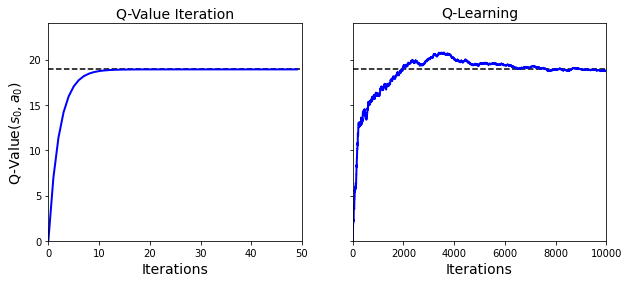

In [145]:
true_Q_value = history1[-1, 0, 0]

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
axes[0].set_ylabel("Q-Value$(s_0, a_0)$", fontsize=14)
axes[0].set_title("Q-Value Iteration", fontsize=14)
axes[1].set_title("Q-Learning", fontsize=14)
for ax, width, history in zip(axes, (50, 10000), (history1, history2)):
    ax.plot([0, width], [true_Q_value, true_Q_value], "k--")
    ax.plot(np.arange(width), history[:, 0, 0], "b-", linewidth=2)
    ax.set_xlabel("Iterations", fontsize=14)
    ax.axis([0, width, 0, 24])

## Deep Q-Network

Let's build the DQN. Given a state, it will estimate, for each possible action, the sum of discounted future rewards it can expect after it plays that action (but before it sees its outcome):

In [146]:
keras.backend.clear_session()

env = gym.make("CartPole-v1")
input_shape = [4] # == env.observation_space.shape
n_outputs = 2 # == env.action_space.n

model = keras.models.Sequential([
    keras.layers.Dense(32, activation="elu", input_shape=input_shape),
    keras.layers.Dense(32, activation="elu"),
    keras.layers.Dense(n_outputs)
])

To select an action using this DQN, we just pick the action with the largest predicted Q-value. However, to ensure that the agent explores the environment, we choose a random action with probability epsilon.

In [147]:
def epsilon_greedy_policy(state, epsilon=0):
    if np.random.rand() < epsilon:
        return np.random.randint(n_outputs)
    else:
        Q_values = model.predict(state[np.newaxis])
        return np.argmax(Q_values[0])

We will also need a replay memory. It will contain the agent's experiences, in the form of tuples: (obs, action, reward, next_obs, done). We can use the deque class for that:

In [148]:
from collections import deque

replay_memory = deque(maxlen=2000)

And let's create a function to sample experiences from the replay memory. It will return 5 NumPy arrays: [obs, actions, rewards, next_obs, dones].

In [149]:
def sample_experiences(batch_size):
    indices = np.random.randint(len(replay_memory), size=batch_size)
    batch = [replay_memory[index] for index in indices]
    states, actions, rewards, next_states, dones = [
        np.array([experience[field_index] for experience in batch])
        for field_index in range(5)]
    return states, actions, rewards, next_states, dones

Now we can create a function that will use the DQN to play one step, and record its experience in the replay memory:

In [150]:
def play_one_step(env, state, epsilon):
    action = epsilon_greedy_policy(state, epsilon)
    next_state, reward, done, info = env.step(action)
    replay_memory.append((state, action, reward, next_state, done))
    return next_state, reward, done, info

Lastly, let's create a function that will sample some experiences from the replay memory and perform a training step:

Notes:

- The first 3 releases of the 2nd edition were missing the reshape() operation which converts target_Q_values to a column vector (this is required by the loss_fn()).
- The book uses a learning rate of 1e-3, but in the code below I use 1e-2, as it significantly improves training. I also tuned the learning rates of the DQN variants below.

In [151]:
batch_size = 32
discount_rate = 0.95
optimizer = keras.optimizers.Adam(learning_rate=1e-2)
loss_fn = keras.losses.mean_squared_error

def training_step(batch_size):
    experiences = sample_experiences(batch_size)
    states, actions, rewards, next_states, dones = experiences
    next_Q_values = model.predict(next_states)
    max_next_Q_values = np.max(next_Q_values, axis=1)
    target_Q_values = (rewards +
                       (1 - dones) * discount_rate * max_next_Q_values)
    target_Q_values = target_Q_values.reshape(-1, 1)
    mask = tf.one_hot(actions, n_outputs)
    with tf.GradientTape() as tape:
        all_Q_values = model(states)
        Q_values = tf.reduce_sum(all_Q_values * mask, axis=1, keepdims=True)
        loss = tf.reduce_mean(loss_fn(target_Q_values, Q_values))
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

In [152]:
rewards = [] 
best_score = 0

for episode in range(600):
    obs = env.reset()    
    for step in range(200):
        epsilon = max(1 - episode / 500, 0.01)
        obs, reward, done, info = play_one_step(env, obs, epsilon)
        if done:
            break
    rewards.append(step) 
    if step >= best_score: 
        best_weights = model.get_weights() 
        best_score = step 
    print("\rEpisode: {}, Steps: {}, eps: {:.3f}".format(episode, step + 1, epsilon), end="") 
    if episode > 50:
        training_step(batch_size)

Episode: 599, Steps: 200, eps: 0.010

In [153]:
model.set_weights(best_weights)

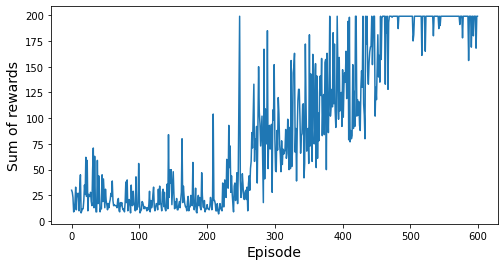

In [154]:
plt.figure(figsize=(8, 4))
plt.plot(rewards)
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Sum of rewards", fontsize=14)
plt.show()

In [155]:
state = env.reset()

frames = []

for step in range(200):
    action = epsilon_greedy_policy(state)
    state, reward, done, info = env.step(action)
    if done:
        break
    img = env.render(mode="rgb_array")
    frames.append(img)
    
plot_animation(frames)

## Double DQN

In [156]:
keras.backend.clear_session()

model = keras.models.Sequential([
    keras.layers.Dense(32, activation="elu", input_shape=[4]),
    keras.layers.Dense(32, activation="elu"),
    keras.layers.Dense(n_outputs)
])

target = keras.models.clone_model(model)
target.set_weights(model.get_weights())

In [157]:
batch_size = 32
discount_rate = 0.95
optimizer = keras.optimizers.Adam(learning_rate=6e-3)
loss_fn = keras.losses.Huber()

def training_step(batch_size):
    experiences = sample_experiences(batch_size)
    states, actions, rewards, next_states, dones = experiences
    next_Q_values = model.predict(next_states)
    best_next_actions = np.argmax(next_Q_values, axis=1)
    next_mask = tf.one_hot(best_next_actions, n_outputs).numpy()
    next_best_Q_values = (target.predict(next_states) * next_mask).sum(axis=1)
    target_Q_values = (rewards + 
                       (1 - dones) * discount_rate * next_best_Q_values)
    target_Q_values = target_Q_values.reshape(-1, 1)
    mask = tf.one_hot(actions, n_outputs)
    with tf.GradientTape() as tape:
        all_Q_values = model(states)
        Q_values = tf.reduce_sum(all_Q_values * mask, axis=1, keepdims=True)
        loss = tf.reduce_mean(loss_fn(target_Q_values, Q_values))
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

In [158]:
replay_memory = deque(maxlen=2000)

In [159]:
rewards = []
best_score = 0

for episode in range(600):
    obs = env.reset()    
    for step in range(200):
        epsilon = max(1 - episode / 500, 0.01)
        obs, reward, done, info = play_one_step(env, obs, epsilon)
        if done:
            break
    rewards.append(step)
    if step >= best_score:
        best_weights = model.get_weights()
        best_score = step
    print("\rEpisode: {}, Steps: {}, eps: {:.3f}".format(episode, step + 1, epsilon), end="")
    if episode >= 50:
        training_step(batch_size)
        if episode % 50 == 0:
            target.set_weights(model.get_weights())

Episode: 599, Steps: 50, eps: 0.0100

In [160]:
model.set_weights(best_weights)

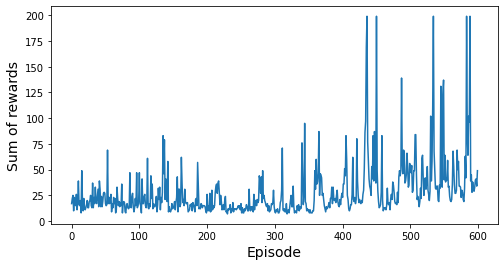

In [161]:
plt.figure(figsize=(8, 4))
plt.plot(rewards)
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Sum of rewards", fontsize=14)
plt.show()

In [162]:
state = env.reset()

frames = []

for step in range(200):
    action = epsilon_greedy_policy(state)
    state, reward, done, info = env.step(action)
    if done:
        break
    img = env.render(mode="rgb_array")
    frames.append(img)
    
plot_animation(frames)

In [163]:
env.close()

## Using TF-Agents to Beat Breakout

Let's use TF-Agents to create an agent that will learn to play Breakout. We will use the Deep Q-Learning algorithm, so we can easily compare the components with the previous implementation, but TF-Agents implements many other (and more sophisticated) algorithms!

## TF-Agents Environments

In [164]:
from tf_agents.environments import suite_gym

env = suite_gym.load("Breakout-v4")
env

NameNotFound: The environment `Breakout` has been moved out of Gym to the package `ale-py`. Please install the package via `pip install ale-py`. You can instantiate the new namespaced environment as `ALE/Breakout`.
  In call to configurable 'load' (<function load at 0x00000200150FA5E0>)

# NOTE: TF-AGENTS NO LONGER SUPPORTS BREAKOUT. THE FOLLOWING NOTEBOOK SHOWS THE APPLICATION OF TF-AGENTS: https://github.com/ageron/handson-ml2/blob/master/18_reinforcement_learning.ipynb

## Extra Material

### Deque vs Rotating List

The deque class offers fast append, but fairly slow random access (for large replay memories):

In [ ]:
from collections import deque
np.random.seed(42)

mem = deque(maxlen=1000000)
for i in range(1000000):
    mem.append(i)
[mem[i] for i in np.random.randint(1000000, size=5)]

In [ ]:
%timeit mem.append(1)

In [ ]:
%timeit [mem[i] for i in np.random.randint(1000000, size=5)]

Alternatively, you could use a rotating list like this ReplayMemory class. This would make random access faster for large replay memories:

In [ ]:
class ReplayMemory:
    def __init__(self, max_size):
        self.buffer = np.empty(max_size, dtype=np.object)
        self.max_size = max_size
        self.index = 0
        self.size = 0

    def append(self, obj):
        self.buffer[self.index] = obj
        self.size = min(self.size + 1, self.max_size)
        self.index = (self.index + 1) % self.max_size

    def sample(self, batch_size):
        indices = np.random.randint(self.size, size=batch_size)
        return self.buffer[indices]

In [ ]:
mem = ReplayMemory(max_size=1000000)
for i in range(1000000):
    mem.append(i)
mem.sample(5)

In [ ]:
%timeit mem.append(1)

In [ ]:
%timeit mem.sample(5)

## Creating a Custom TF-Agents Environment

To create a custom TF-Agent environment, you just need to write a class that inherits from the PyEnvironment class and implements a few methods. For example, the following minimal environment represents a simple 4x4 grid. The agent starts in one corner (0,0) and must move to the opposite corner (3,3). The episode is done if the agent reaches the goal (it gets a +10 reward) or if the agent goes out of bounds (-1 reward). The actions are up (0), down (1), left (2) and right (3).

In [ ]:
class MyEnvironment(tf_agents.environments.py_environment.PyEnvironment):
    def __init__(self, discount=1.0):
        super().__init__()
        self._action_spec = tf_agents.specs.BoundedArraySpec(
            shape=(), dtype=np.int32, name="action", minimum=0, maximum=3)
        self._observation_spec = tf_agents.specs.BoundedArraySpec(
            shape=(4, 4), dtype=np.int32, name="observation", minimum=0, maximum=1)
        self.discount = discount

    def action_spec(self):
        return self._action_spec

    def observation_spec(self):
        return self._observation_spec

    def _reset(self):
        self._state = np.zeros(2, dtype=np.int32)
        obs = np.zeros((4, 4), dtype=np.int32)
        obs[self._state[0], self._state[1]] = 1
        return tf_agents.trajectories.time_step.restart(obs)

    def _step(self, action):
        self._state += [(-1, 0), (+1, 0), (0, -1), (0, +1)][action]
        reward = 0
        obs = np.zeros((4, 4), dtype=np.int32)
        done = (self._state.min() < 0 or self._state.max() > 3)
        if not done:
            obs[self._state[0], self._state[1]] = 1
        if done or np.all(self._state == np.array([3, 3])):
            reward = -1 if done else +10
            return tf_agents.trajectories.time_step.termination(obs, reward)
        else:
            return tf_agents.trajectories.time_step.transition(obs, reward,
                                                               self.discount)

The action and observation specs will generally be instances of the ArraySpec or BoundedArraySpec classes from the tf_agents.specs package (check out the other specs in this package as well). Optionally, you can also define a render() method, a close() method to free resources, as well as a time_step_spec() method if you don't want the reward and discount to be 32-bit float scalars. Note that the base class takes care of keeping track of the current time step, which is why we must implement _reset() and _step() rather than reset() and step().

In [ ]:
my_env = MyEnvironment()
time_step = my_env.reset()
time_step

In [ ]:
time_step = my_env.step(1)
time_step

# End of Chapter Exercises

1. How would you define Reinforcement Learning? How is it different from regular
supervised or unsupervised learning?
2. Can you think of three possible applications of RL that were not mentioned in
this chapter? For each of them, what is the environment? What is the agent?
What are some possible actions? What are the rewards?
3. What is the discount factor? Can the optimal policy change if you modify the dis‐
count factor?
4. How do you measure the performance of a Reinforcement Learning agent?
5. What is the credit assignment problem? When does it occur? How can you allevi‐
ate it?
6. What is the point of using a replay buffer?
7. What is an off-policy RL algorithm?
8. Use policy gradients to solve OpenAI Gym’s LunarLander-v2 environment. You
will need to install the Box2D dependencies (python3 -m pip install -U
gym[box2d]).
9. Use TF-Agents to train an agent that can achieve a superhuman level at
SpaceInvaders-v4 using any of the available algorithms.
10. If you have about $100 to spare, you can purchase a Raspberry Pi 3 plus some
cheap robotics components, install TensorFlow on the Pi, and go wild! For an
example, check out this fun post by Lukas Biewald, or take a look at GoPiGo or
BrickPi. Start with simple goals, like making the robot turn around to find the
brightest angle (if it has a light sensor) or the closest object (if it has a sonar sen‐
sor), and move in that direction. Then you can start using Deep Learning: for
example, if the robot has a camera, you can try to implement an object detection
algorithm so it detects people and moves toward them. You can also try to use RL
to make the agent learn on its own how to use the motors to achieve that goal.
Have fun!


***1. How would you define Reinforcement Learning? How is it different from regular
supervised or unsupervised learning?***

A: Reinforcement learning is an area in Machine Learning that focuses on creating agents that are capable of mastering tasks assigned to it in a way that encourages it to get the maximum rewards as a way of getting better at the task until it has mastered it.

It is different from supervised or unsupervised learning because in Rienforcement learning, the agent is not necessarily given the correct answer and it instead learns by trial and error. Supervised and Unsupervised learning also doesn't have a large need for exploration where it is important for the agent in the respective environment it is working in. 

***2. Can you think of three possible applications of RL that were not mentioned in
this chapter? For each of them, what is the environment? What is the agent?
What are some possible actions? What are the rewards?***

A: *Reinforcement learning in NLP* : Reinforcement learning could be used to help in answering questions. The agent would be trained in an environment where it is taught how to answer questions correctly and based on how it does it is rewarding when it guesses the answer correctly. This could also work in text summarization for documents or books.

*Applications in Health Care*: RL could be used in health care to determine treaments regimes for patients or it could also be used in critical care situation. The agent could be given data on diagnosing patients symptoms, or correctly guessing treatments for chronic diseases such as diabetes or Cancer. They would work primarily in the environment of a hospital with patients that enter the hospital on an hourly basis. Some actions could be going down a system of symptoms to correctly determine what disease or abnormality is causing the discomfort in the individual in question. Rewards are points made on correct guesses and negative rewards could be huge point penalties for serious diseases and small penalties for minor symptoms in the patient.

*News recommendations for users*: This would have a similar aspect of recommender systems but for something like the news. The agent would be trying to correctly get recommendations for users. This could be achieved by recommending articles to users to read and if they enjoy them they would respond to a system notification asking if they enjoyed the recommendation. Positive rewards are comments like "YES" and negative rewards are "NO" and smaller negative rewards if "I don't know/okay". The environment would be a device for the user. 

***3. What is the discount factor? Can the optimal policy change if you modify the dis‐
count factor?***

A: When you are attempting to estimate the value of an action, it is typically summed with other actions. In this case, there is much more weight to immediate rewards and less weight towards later rewards. As a result, the agent may never reach the most optimal situation because it never looking steps ahead. This could be thought of an alpha too large for gradient descent and keeps overshooting local mins or maxes. With a discount factor for each reward. If a reward is 100 with a discount factor of 0.8, The next step is 80 and the subsequent step is 64. The closer to 1, the better for futre actions being valued higher and vise versa. The discount factor can definately change the optimal policy where an agent may only value immediate rewards if it doesn't value the future and will never learn where the opposite situation would cause the agent to put up with immediate pain for eventual rewards. 

***4. How do you measure the performance of a Reinforcement Learning agent?***

A: By summing up the rewards it recieved based on the actions it takes in it's environment. This can also be done as an aveerage over a set amount of runs.

***5. What is the credit assignment problem? When does it occur? How can you allevi‐
ate it?***

A: The credit assignment is a problem when a RL agent doesn't actually know why it received a reward. This could have been from the previous action or 10 actions ago. As a result it has a poor way of understanding why it is doing well and doesn't learn. This can be solved by providing shoret term rewards with prior knowledge about the tasks. So instead of giving a reward in pong when it scores a point, it could be when it hits the ball back successfully. 

***6. What is the point of using a replay buffer?***

A: A replay buffer is like a replay memory, so for an RL agent, instead of learning only from the past few actions, it can learn from a set of actions in a memory/memories it performed previously like looking at how you studied before to get you the grade you have now and learning from that to do better next time around. 

***7. What is an off-policy RL algorithm?***

A: An off-policy algorithm can be looked at like a map for an agent. The agent using an off-policy algorithm can learn the value of the optimal path for the task(s) it is given in it's set environment (Sum of all discount awards resulting in the optimal solution). Where an on-policy algorithm allows the agent to learn from it's previous actions to improve instead of a roadmap.

In [1]:
# Question 8
'''8. Use policy gradients to solve OpenAI Gym’s LunarLander-v2 environment. You
will need to install the Box2D dependencies (python3 -m pip install -U
gym[box2d]).'''

import tensorflow as tf
import os
from tensorflow import keras
import numpy as np
import pandas as pd
import os 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
tf.__version__

'2.8.0'

In [3]:
keras.__version__

'2.8.0'

In [4]:
# !pip install box2d-py
# !pip install gym[Box_2D]
import gym
env = gym.make("LunarLander-v2") # creating lunar landing environment 

In [5]:
env.observation_space

Box(-inf, inf, (8,), float32)

Based on the above, the inputs in this case are 8-dimensional. Let's reset our environment and pick a random seed. 

In [6]:
obs = env.reset(seed=18)
obs

array([ 0.00650425,  1.4197242 ,  0.6587968 ,  0.39127856, -0.00753003,
       -0.14922732,  0.        ,  0.        ], dtype=float32)

In the source code on [github](https://github.com/openai/gym/blob/master/gym/envs/box2d/lunar_lander.py) we can see that these each 8D observation (x, y, h, v, a, w, l, r) correspond to:

- x,y: the coordinates of the spaceship. It starts at a random location near (0, 1.4) and must land near the target at (0, 0).
- h,v: the horizontal and vertical speed of the spaceship. It starts with a small random speed.
- a,w: the spaceship's angle and angular velocity.
- l,r: whether the left or right leg touches the ground (1.0) or not (0.0).

The action space is discrete, with 4 possible actions:

In [7]:
env.action_space

Discrete(4)

These are also the actions for the lunarlander:

- do nothing
- fire left orientation engine
- fire main engine
- fire right orientation engine

Now to try and build a simple policyt neural net with 4 output neurons based on the actions and see how we can do:

In [8]:
n_inputs = env.observation_space.shape[0]
n_outputs = env.action_space.n

model = keras.models.Sequential([
    keras.layers.Dense(32, activation="relu", input_shape=[n_inputs]),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(n_outputs, activation="softmax"),
])

Now to create a function to play one step at a time for the lander:

In [9]:
def lander_play_one_step(env, obs, model, loss_fn):
    with tf.GradientTape() as tape:
        probas = model(obs[np.newaxis])
        logits = tf.math.log(probas + keras.backend.epsilon())
        action = tf.random.categorical(logits, num_samples=1)
        loss = tf.reduce_mean(loss_fn(action, probas))
    grads = tape.gradient(loss, model.trainable_variables)
    obs, reward, done, info = env.step(action[0, 0].numpy())
    return obs, reward, done, grads

And for multiple episodes:

In [10]:
def lander_play_multiple_episodes(env, n_episodes, n_max_steps, model, loss_fn):
    all_rewards = []
    all_grads = []
    for episode in range(n_episodes):
        current_rewards = []
        current_grads = []
        obs = env.reset()
        for step in range(n_max_steps):
            obs, reward, done, grads = lander_play_one_step(env, obs, model, loss_fn)
            current_rewards.append(reward)
            current_grads.append(grads)
            if done:
                break
        all_rewards.append(current_rewards)
        all_grads.append(current_grads)
    return all_rewards, all_grads

Let's also use the discount rewards and discount_and_normalize_rewards function as well from earlier:

In [11]:
def discount_rewards(rewards, discount_rate):
    discounted = np.array(rewards)
    for step in range(len(rewards) - 2, -1, -1):
        discounted[step] += discounted[step + 1] * discount_rate
    return discounted

def discount_and_normalize_rewards(all_rewards, discount_rate):
    all_discounted_rewards = [discount_rewards(rewards, discount_rate)
                              for rewards in all_rewards]
    flat_rewards = np.concatenate(all_discounted_rewards)
    reward_mean = flat_rewards.mean()
    reward_std = flat_rewards.std()
    return [(discounted_rewards - reward_mean) / reward_std
            for discounted_rewards in all_discounted_rewards]

In [12]:
# Hyperparameters

n_iterations = 400
n_episodes_per_update = 20
n_max_steps = 1000
discount_rate = 0.99

In [13]:
# Now for optimizer and loss function
optimizer = keras.optimizers.Nadam(learning_rate=0.005)
loss_fn = keras.losses.sparse_categorical_crossentropy

In [14]:
# Training the model
mean_rewards = []

for iteration in range(n_iterations):
    all_rewards, all_grads = lander_play_multiple_episodes(
        env, n_episodes_per_update, n_max_steps, model, loss_fn)
    mean_reward = sum(map(sum, all_rewards)) / n_episodes_per_update
    print("\rIteration: {}/{}, mean reward: {:.1f}  ".format(
        iteration + 1, n_iterations, mean_reward), end="")
    mean_rewards.append(mean_reward)
    all_final_rewards = discount_and_normalize_rewards(all_rewards,
                                                       discount_rate)
    all_mean_grads = []
    for var_index in range(len(model.trainable_variables)):
        mean_grads = tf.reduce_mean(
            [final_reward * all_grads[episode_index][step][var_index]
             for episode_index, final_rewards in enumerate(all_final_rewards)
                 for step, final_reward in enumerate(final_rewards)], axis=0)
        all_mean_grads.append(mean_grads)
    optimizer.apply_gradients(zip(all_mean_grads, model.trainable_variables))

Iteration: 400/400, mean reward: 257.4  

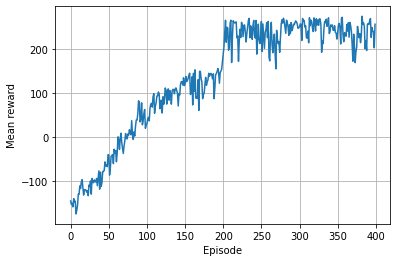

In [15]:
# Visualization
plt.plot(mean_rewards)
plt.xlabel("Episode")
plt.ylabel("Mean reward")
plt.grid()
plt.show()

Now to create a function that outputs the results for us:

In [38]:
def lander_render_policy_net(model, n_max_steps=1500, seed=18):
    frames = []
    env = gym.make("LunarLander-v2")
    tf.random.set_seed(seed)
    np.random.seed(seed)
    obs = env.reset(seed=18)
    for step in range(n_max_steps):
        frames.append(env.render(mode="rgb_array"))
        probas = model(obs[np.newaxis])
        logits = tf.math.log(probas + keras.backend.epsilon())
        action = tf.random.categorical(logits, num_samples=1)
        obs, reward, done, info = env.step(action[0, 0].numpy())
        if done:
            break
    env.close()
    return frames

In [39]:
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')

def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = animation.FuncAnimation(
        fig, update_scene, fargs=(frames, patch),
        frames=len(frames), repeat=repeat, interval=interval)
    plt.close()
    return anim

In [40]:
frames = lander_render_policy_net(model, seed=18)
plot_animation(frames)

# End of Notebook